In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hist
import mplhep as hep
from utils import data_prep
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [14]:
df = data_prep.load_and_prep_data("data/ncdatachallenge-2021-v1.csv")

In [25]:
for colname in df.columns:
    print(colname, df[colname].dtype, np.count_nonzero(df[colname].isnull()))

bmi float64 0
age int64 0
country category 0
been_pregnant_before category 0
education category 0
sleeping_pattern category 0
n_cycles_trying int64 0
outcome object 0
dedication float64 0
average_cycle_length float64 6
cycle_length_std float64 25
regular_cycle bool 0
intercourse_frequency float64 0
pregnant bool 0


In [30]:
def plot_col(df, colname):
    col = df[colname]
    fig = plt.figure()
    ax = fig.add_subplot()
    hall = hist.Hist(hist.axis.StrCategory(col.cat.categories)).fill(col)
    hpreg = hist.Hist(hist.axis.StrCategory(col.cat.categories)).fill(col[df["outcome"] == "pregnant"])
    ax.tick_params(labelrotation=90)
    hall.plot(ax=ax, histtype="fill", color="#e0ecf4", label="All participants", linewidth=1, edgecolor='#1f4056')
    hpreg.plot(ax=ax, histtype="fill", color="#8856a7", label="Pregnant", linewidth=1, edgecolor='#22152a')
    plt.legend()
    fig.suptitle(colname)
    ax.set_xlabel("")
    ax.set_ylabel("Number of participants")
    plt.savefig(f"plots/{colname}.png", dpi=600, bbox_inches='tight')
    return fig

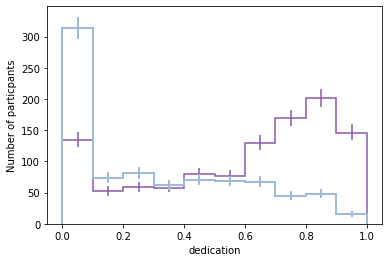

In [16]:
hdedpreg = hist.Hist(hist.axis.Regular(10, 0, 1.0, name="dedication")).fill(df[df["outcome"] == "pregnant"]["dedication"])
hdednon = hist.Hist(hist.axis.Regular(10, 0, 1.0, name="dedication")).fill(df[df["outcome"] != "pregnant"]["dedication"])
hdedpreg.plot(label="Pregnant", color='#8856a7')
hdednon.plot(label="Not pregnant", color="#9ebcda", linewidth=2)
plt.ylabel("Number of particpants")
plt.savefig("plots/dedication_hist.png", dpi=600)

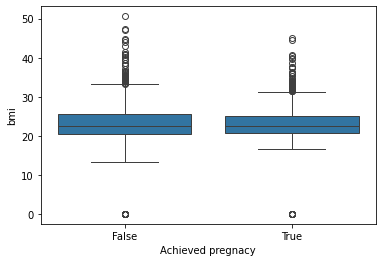

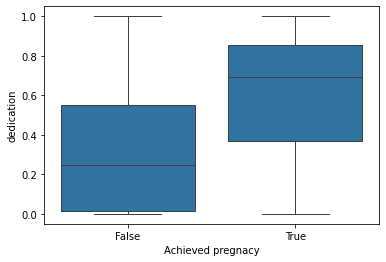

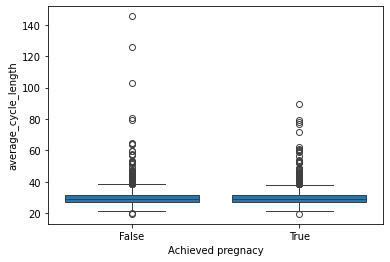

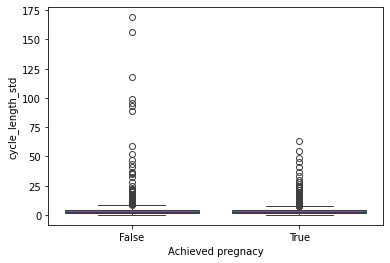

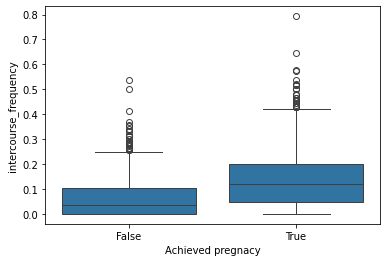

In [15]:
for colname in df.columns[df.dtypes == float]:
    fig = plt.figure()
    ax = fig.add_subplot()
    sns.boxplot(data=df, x=df["pregnant"], y=df[colname], ax=ax)
    ax.set_xlabel("Achieved pregnacy")
    plt.savefig(f"plots/{colname}.png", dpi=600)

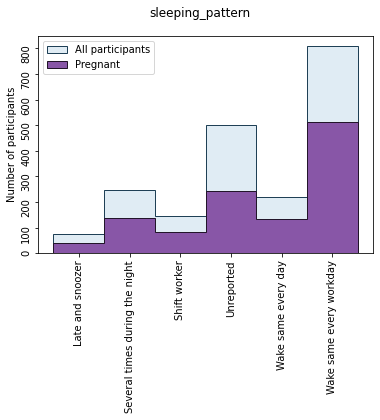

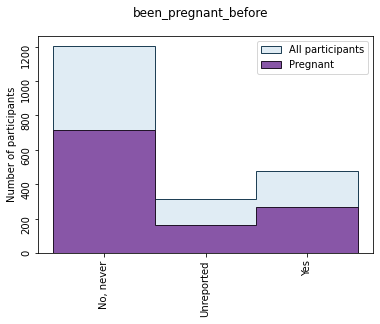

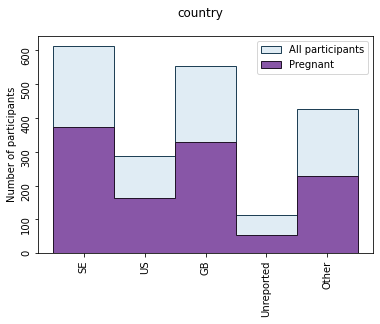

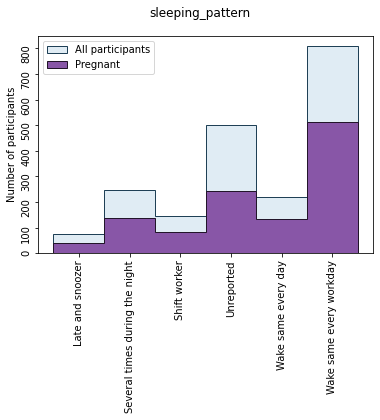

In [31]:
for colname in ["sleeping_pattern", "been_pregnant_before", "country", "sleeping_pattern"]:
    plot_col(df, colname)

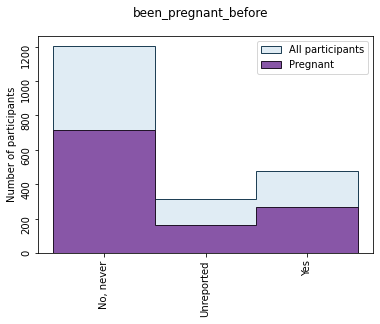

In [32]:
data_prep.merge_categories(df, "been_pregnant_before", ["No, never", "Unreported",], "Yes")
fig = plot_col(df, "been_pregnant_before")

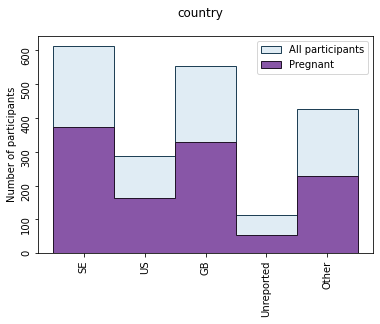

In [33]:
data_prep.merge_categories(df, "country", ["SE", "US", "GB", "Unreported",], "Other")
fig = plot_col(df, "country")

/var/folders/r2/5d99yt5j23s3c5nzcgbv0yvr0000gn/T/ipykernel_21754/3593252644.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop(["n_cycles_trying", "pregnant"], axis=1).corr())


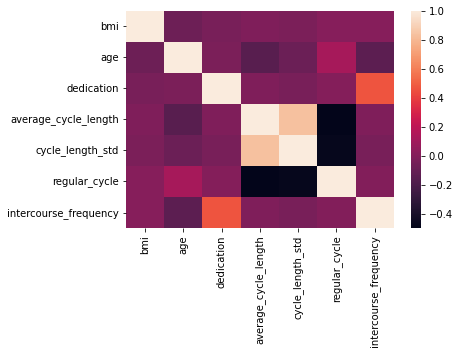

In [17]:
sns.heatmap(df.drop(["n_cycles_trying", "pregnant"], axis=1).corr())
plt.savefig(f"plots/correlation.png", dpi=600)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x293148430>, cbar=<matplotlib.colorbar.Colorbar object at 0x293158c40>, text=[])

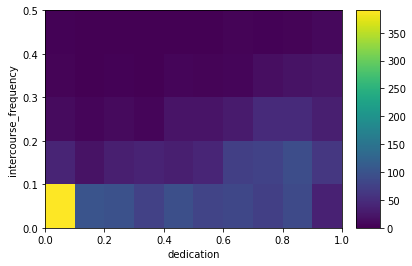

In [106]:
h2d = hist.Hist(hist.axis.Regular(10, 0, 1., name="dedication"), hist.axis.Regular(5, 0, 0.5, name="intercourse_frequency")).fill(df["dedication"], df["intercourse_frequency"])
h2d.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x2934241f0>, cbar=<matplotlib.colorbar.Colorbar object at 0x293434f40>, text=[])

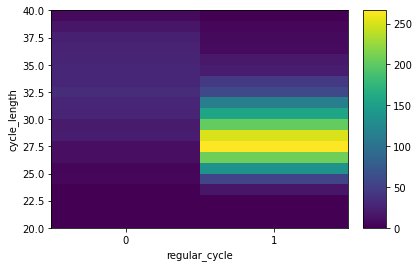

In [112]:
h2d = hist.Hist(hist.axis.Boolean(name="regular_cycle"), hist.axis.Regular(20, 20, 40, name="cycle_length")).fill(df["regular_cycle"], df["average_cycle_length"])
h2d.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x2936eba90>, cbar=<matplotlib.colorbar.Colorbar object at 0x2936ebee0>, text=[])

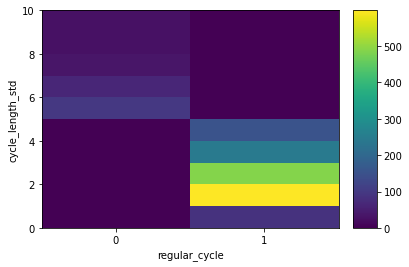

In [118]:
h2d = hist.Hist(hist.axis.Boolean(name="regular_cycle"), hist.axis.Regular(10, 0, 10, name="cycle_length_std")).fill(df["regular_cycle"], df["cycle_length_std"])
h2d.plot()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x17f74d4c0>, cbar=<matplotlib.colorbar.Colorbar object at 0x17f7630a0>, text=[])

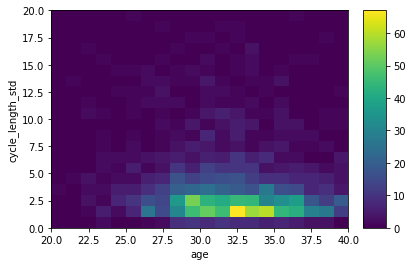

In [8]:
h2d = hist.Hist(hist.axis.Regular(20, 20, 40, name="age"), hist.axis.Regular(20, 0, 20, name="cycle_length_std")).fill(df["age"], df["cycle_length_std"])
h2d.plot()

In [ ]:
h2d = hist.Hist(hist.axis.Regular(20, 20, 40, name="age"), hist.axis.Regular(20, 20, 40, name="cycle_length")).fill(df["age"], df["average_cycle_length"])
h2d.plot()

In [120]:
df[df["cycle_length_std"] > df["average_cycle_length"]]

,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency,pregnant
207,22.229062,31,SE,"No, never",University,Wake same every workday,1,not_pregnant,0.000000,42.928571,46.778470,False,0.000000,False
1095,23.030045,34,SE,"No, never",High school,Unreported,4,not_pregnant,0.000000,57.875000,88.969397,False,0.000000,False
1227,20.415225,32,GB,Unreported,PhD,Shift worker,1,not_pregnant,0.000000,63.750000,93.077157,False,0.000000,False
1300,20.936639,31,GB,"No, never",University,Wake same every day,6,not_pregnant,0.858369,80.333333,117.825082,False,0.081545,False
1521,23.888441,31,Other,"No, never",University,Unreported,1,not_pregnant,0.444444,145.500000,168.998521,False,0.037037,False
1555,20.195578,32,SE,"No, never",University,Unreported,1,not_pregnant,0.000000,126.000000,156.751396,False,0.000000,False
1586,27.290694,30,US,Yes,University,Unreported,1,not_pregnant,0.266667,79.500000,95.671312,False,0.000000,False
1993,21.453574,30,Other,"No, never",University,Wake same every workday,1,not_pregnant,0.000000,38.600000,41.126634,False,0.000000,False


In [36]:
df

,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency,pregnant
0,22.942130,31,SE,"No, never",University,Wake same every workday,1,pregnant,0.640000,25.588235,2.526332,True,0.200000,True
1,19.886054,34,Unreported,Unreported,University,Unreported,7,pregnant,0.009569,30.875000,3.522884,True,0.052632,True
2,29.323049,41,SE,"No, never",University,Several times during the night,4,not_pregnant,0.298246,27.666667,2.503331,True,0.149123,False
3,24.386526,27,SE,"No, never",High school,Wake same every workday,2,pregnant,0.895833,24.250000,3.453776,True,0.145833,True
4,29.299971,29,SE,"No, never",Trade/technical/vocational training,Wake same every day,2,pregnant,0.666667,25.466667,0.990430,True,0.254902,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,24.867781,36,GB,Yes,PhD,Unreported,1,not_pregnant,0.000000,30.250000,2.061553,True,0.000000,False
1991,21.616406,32,GB,"No, never",Unreported,Wake same every workday,2,pregnant,0.843750,31.166667,2.483277,True,0.000000,True
1992,24.218750,23,SE,Unreported,High school,Wake same every workday,20,not_pregnant,0.540187,26.629630,1.620735,True,0.050467,False
1993,21.453574,30,Other,"No, never",University,Wake same every workday,1,not_pregnant,0.000000,38.600000,41.126634,False,0.000000,False
